# 2013 統計数理

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from shiori.utils.viewer import set_plot_params
from shiori.utils.path import ProjectPath
import numpy as np
from pathlib import Path

In [5]:
set_plot_params()
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})

In [6]:
name = Path().cwd().name + "/2013"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir

# [1]

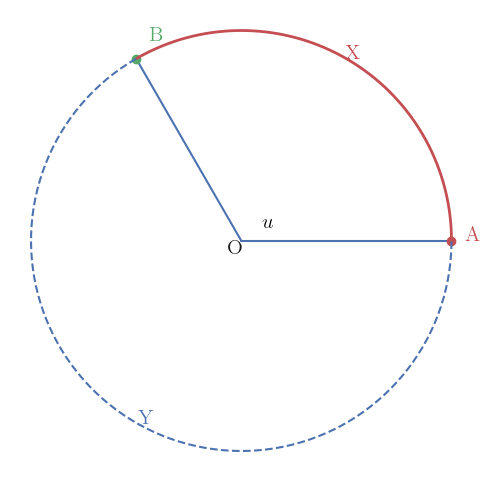

In [10]:
r = 1/(2*np.pi)
O = np.array([0,0])
A = np.array([r,0])
u = 2*np.pi/3
B = np.array([r*np.cos(u), r*np.sin(u)])

theta = np.linspace(0, 2*np.pi, 400)
circle_x = r*np.cos(theta)
circle_y = r*np.sin(theta)

# 弧AB: 短い方
arc_theta_short = np.linspace(0, u, 200) if u <= np.pi else np.linspace(u, 2*np.pi, 200)
arc_x_short = r*np.cos(arc_theta_short)
arc_y_short = r*np.sin(arc_theta_short)

# 弧AB: 長い方
arc_theta_long = np.linspace(u, 2*np.pi, 200) if u <= np.pi else np.linspace(0, u, 200)
arc_x_long = r*np.cos(arc_theta_long)
arc_y_long = r*np.sin(arc_theta_long)

plt.figure(figsize=(5,5))
# plt.plot(circle_x, circle_y, 'k--', alpha=0.5)   # 円
plt.plot([O[0],A[0]], [O[1],A[1]], 'b-')         # OA
plt.plot([O[0],B[0]], [O[1],B[1]], 'b-')         # OB
plt.plot(A[0], A[1], 'ro')  # A
plt.plot(B[0], B[1], 'go')  # B

# ラベル
plt.text(A[0]+0.01, A[1], "A", color="r", fontsize=15)
plt.text(B[0]+0.01, B[1]*1.1, "B", color="g", fontsize=15)
plt.text(O[0]-0.01, O[1]-0.01, "O", color="k", fontsize=15)

# 弧にラベル
mid_short = (arc_x_short[len(arc_x_short)//2], arc_y_short[len(arc_y_short)//2])
plt.text(mid_short[0], mid_short[1], "X", color="r", fontsize=15)

mid_long = (arc_x_long[len(arc_x_long)//2], arc_y_long[len(arc_y_long)//2])
plt.text(mid_long[0], mid_long[1], "Y", color="b", fontsize=15)

# 角度uの表示
plt.text(0.1*A[0], 0.01, r"$u$", fontsize=15)

plt.plot(arc_x_short, arc_y_short, 'r', linewidth=2)
plt.plot(arc_x_long, arc_y_long, 'b', linestyle="--")

plt.gca().set_aspect("equal")
plt.axis(False)
plt.tight_layout()
# plt.savefig(save_dir.joinpath("circle.png"), dpi=300, facecolor="white")
plt.show()

# [2]

In [11]:
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})

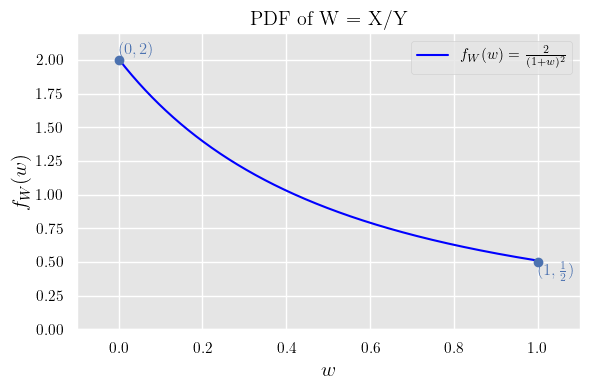

In [12]:
# w の範囲
eps = 1e-6
w = np.linspace(0+eps, 1-eps, 500)

# 確率密度関数
f_w = np.where((w > 0) & (w < 1), 2/(1+w)**2, 0)

# plot
plt.figure(figsize=(6,4))
plt.plot(w, f_w+0.01, label=r"$f_W(w)=\frac{2}{(1+w)^2}$", color="blue")

#(0,2), (1, 0.5)の点を打つ
plt.plot([0, 1], [2, 0.5], 'bo')
plt.text(0, 2+0.05, r"$(0,2)$", fontsize=12, color="b")
plt.text(1, 0.5-0.1, r"$(1,\frac{1}{2})$", fontsize=12, color="b")
# plt.fill_between(w, f_w, alpha=0.2, color="blue")

plt.title("PDF of W = X/Y")
plt.xlabel(r"$w$", fontsize=15)
plt.ylabel(r"$f_W(w)$", fontsize=15)
plt.ylim(0, 2.2)
plt.xlim(0-0.1, 1+0.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(save_dir.joinpath("w_pdf.png"), dpi=300, facecolor="white")
plt.show()


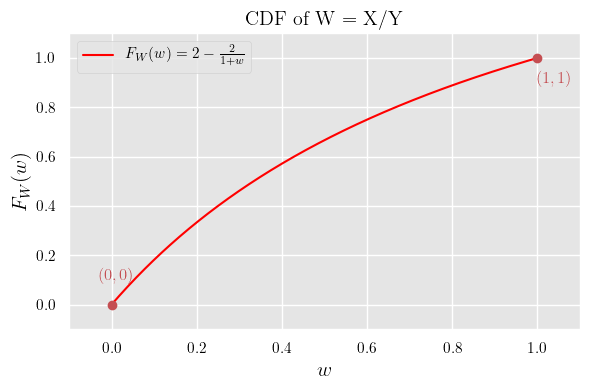

In [13]:
# w の範囲
eps = 1e-6
w = np.linspace(0+eps, 1-eps, 500)

# CDF
F_w = 2 - 2/(1+w)

# plot
plt.figure(figsize=(6,4))
plt.plot(w, F_w, label=r"$F_W(w)=2-\frac{2}{1+w}$", color="red")

# (0,0), (1,1) の点を打つ
plt.plot([0, 1], [0, 1], 'ro')
plt.text(-0.03, 0+0.1, r"$(0,0)$", fontsize=12, color="r")
plt.text(1, 1-0.1, r"$(1,1)$", fontsize=12, color="r")

plt.title("CDF of W = X/Y")
plt.xlabel(r"$w$", fontsize=15)
plt.ylabel(r"$F_W(w)$", fontsize=15)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(save_dir.joinpath("w_cdf.png"), dpi=300, facecolor="white")
plt.show()


# [4]

In [22]:
def z_quantile(alpha=0.05):
    p = 1.0 - alpha/2.0
    try:
        from scipy.stats import norm
        return float(norm.ppf(p))
    except Exception:
        # Acklam (2003) approximation of norm.ppf
        a = [-3.969683028665376e+01,  2.209460984245205e+02,
             -2.759285104469687e+02,  1.383577518672690e+02,
             -3.066479806614716e+01,  2.506628277459239e+00]
        b = [-5.447609879822406e+01,  1.615858368580409e+02,
             -1.556989798598866e+02,  6.680131188771972e+01,
             -1.328068155288572e+01]
        c = [-7.784894002430293e-03, -3.223964580411365e-01,
             -2.400758277161838e+00, -2.549732539343734e+00,
              4.374664141464968e+00,  2.938163982698783e+00]
        d = [ 7.784695709041462e-03,  3.224671290700398e-01,
              2.445134137142996e+00,  3.754408661907416e+00]
        plow = 0.02425
        phigh = 1 - plow
        if p < plow:
            q = (2*p)**0.5
            t = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1.0)
        elif p > phigh:
            q = (2*(1-p))**0.5
            t = -(((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                  ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1.0)
        else:
            q = p - 0.5
            r = q*q
            t = (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5])*q / \
                (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1.0)
        # One Halley refinement step
        import math
        e = 0.5 * (1.0 + math.erf(t / math.sqrt(2.0))) - p
        u = e * math.sqrt(2.0*math.pi) * math.exp(t*t/2.0)
        t = t - u / (1 + t*u/2.0)
        return float(t)


def wald_interval(phat, n, alpha=0.05, unbiased=False):
    var_hat = phat*(1.0 - phat)/n
    if unbiased and n > 1:
        var_hat = var_hat*(n/(n-1.0))
    se = np.sqrt(var_hat)
    z = z_quantile(alpha)
    half = z*se
    lower = np.maximum(0.0, phat - half)
    upper = np.minimum(1.0, phat + half)
    return lower, upper

def simulate_coverage(n=20, alpha=0.05, M=50000, p_grid=None, seed=0):
    rng = np.random.default_rng(seed)
    if p_grid is None:
        p_grid = np.linspace(0.001, 0.999, 199)
    cover_hat = np.zeros_like(p_grid)
    cover_tilde = np.zeros_like(p_grid)
    for i, p in enumerate(p_grid):
        X = rng.binomial(n=n, p=p, size=M)
        phat = X/n
        Lh, Uh = wald_interval(phat, n, alpha=alpha, unbiased=False)
        Lt, Ut = wald_interval(phat, n, alpha=alpha, unbiased=True)
        cover_hat[i] = np.mean((Lh <= p) & (p <= Uh))
        cover_tilde[i] = np.mean((Lt <= p) & (p <= Ut))
    return p_grid, cover_hat, cover_tilde

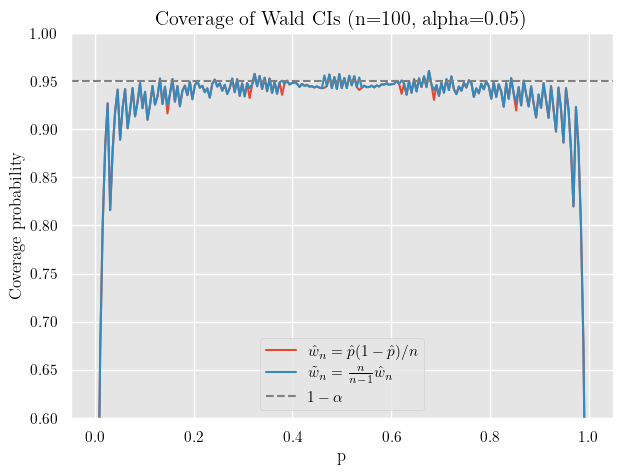

In [25]:

# Parameters
n = 100
alpha = 0.05
M = 50000

p_grid, cov_hat, cov_tilde = simulate_coverage(n=n, alpha=alpha, M=M, seed=42)

plt.figure(figsize=(7, 5))
plt.plot(p_grid, cov_hat, label=r"$\hat w_n=\hat p(1-\hat p)/n$")
plt.plot(p_grid, cov_tilde, label=r"$\tilde w_n=\frac{n}{n-1}\hat w_n$")
plt.axhline(1-alpha, linestyle="--", label=r"$1-\alpha$", color="gray")
plt.xlabel("p")
plt.ylabel("Coverage probability")
plt.title(f"Coverage of Wald CIs (n={n}, alpha={alpha})")
plt.ylim(0.6, 1)
plt.legend()
plt.show()


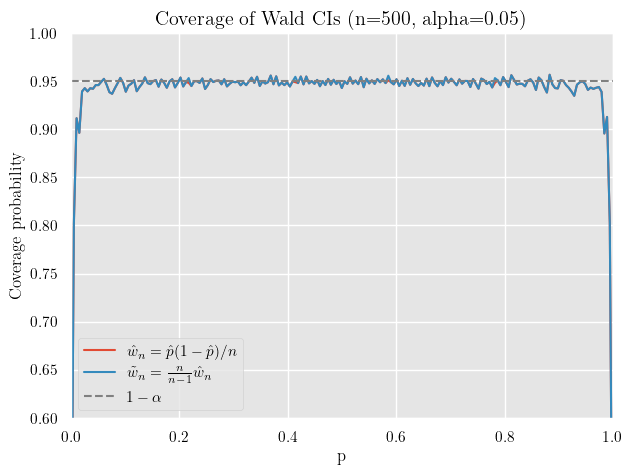

In [34]:
from matplotlib import animation

# ---------- utilities ----------
def z_quantile(alpha=0.05):
    p = 1.0 - alpha/2.0
    try:
        from scipy.stats import norm
        return float(norm.ppf(p))
    except Exception:
        # Acklam (2003) rational approximation + one Halley refinement
        a = [-3.969683028665376e+01,  2.209460984245205e+02,
             -2.759285104469687e+02,  1.383577518672690e+02,
             -3.066479806614716e+01,  2.506628277459239e+00]
        b = [-5.447609879822406e+01,  1.615858368580409e+02,
             -1.556989798598866e+02,  6.680131188771972e+01,
             -1.328068155288572e+01]
        c = [-7.784894002430293e-03, -3.223964580411365e-01,
             -2.400758277161838e+00, -2.549732539343734e+00,
              4.374664141464968e+00,  2.938163982698783e+00]
        d = [ 7.784695709041462e-03,  3.224671290700398e-01,
              2.445134137142996e+00,  3.754408661907416e+00]
        plow = 0.02425
        phigh = 1 - plow
        if p < plow:
            q = (2*p)**0.5
            t = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1.0)
        elif p > phigh:
            q = (2*(1-p))**0.5
            t = -(((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                  ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1.0)
        else:
            q = p - 0.5
            r = q*q
            t = (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5])*q / \
                (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1.0)
        import math
        e = 0.5 * (1.0 + math.erf(t / math.sqrt(2.0))) - p
        u = e * math.sqrt(2.0*math.pi) * math.exp(t*t/2.0)
        t = t - u / (1 + t*u/2.0)
        return float(t)

def wald_interval(phat, n, alpha=0.05, unbiased=False):
    var_hat = phat*(1.0 - phat)/n
    if unbiased and n > 1:
        var_hat = var_hat*(n/(n-1.0))
    se = np.sqrt(var_hat)
    z = z_quantile(alpha)
    half = z*se
    lower = np.maximum(0.0, phat - half)
    upper = np.minimum(1.0, phat + half)
    return lower, upper

def simulate_coverage(n=20, alpha=0.05, M=20000, p_grid=None, seed=0):
    rng = np.random.default_rng(seed)
    if p_grid is None:
        p_grid = np.linspace(0.001, 0.999, 199)
    cover_hat = np.zeros_like(p_grid)
    cover_tilde = np.zeros_like(p_grid)
    for i, p in enumerate(p_grid):
        X = rng.binomial(n=n, p=p, size=M)
        phat = X/n
        Lh, Uh = wald_interval(phat, n, alpha=alpha, unbiased=False)
        Lt, Ut = wald_interval(phat, n, alpha=alpha, unbiased=True)
        cover_hat[i] = np.mean((Lh <= p) & (p <= Uh))
        cover_tilde[i] = np.mean((Lt <= p) & (p <= Ut))
    return p_grid, cover_hat, cover_tilde

# ---------- animation ----------
alpha = 0.05
M = 20000          # increase for smoother curves
Ns = list(range(5, 101, 2)) + list(range(120, 501, 20))  # frames
p_grid = np.linspace(0.001, 0.999, 199)

_cache = {}
def get_cov(n):
    if n not in _cache:
        _cache[n] = simulate_coverage(n=n, alpha=alpha, M=M, p_grid=p_grid, seed=123)
    return _cache[n]

fig, ax = plt.subplots(figsize=(7,5))
(line_hat,)   = ax.plot([], [], label=r"$\hat w_n=\hat p(1-\hat p)/n$")
(line_tilde,) = ax.plot([], [], label=r"$\tilde w_n=\frac{n}{n-1}\hat w_n$")
ax.axhline(1-alpha, linestyle="--", label=r"$1-\alpha$", color="gray")
ax.set_xlabel("p")
ax.set_ylabel("Coverage probability")
title = ax.set_title("")
ax.set_ylim(0.6, 1.0)
ax.set_xlim(0.0, 1.0)
ax.legend()

def init():
    line_hat.set_data([], [])
    line_tilde.set_data([], [])
    title.set_text("")
    return line_hat, line_tilde, title

def update(frame_idx):
    n = Ns[frame_idx]
    _, cov_hat, cov_tilde = get_cov(n)
    line_hat.set_data(p_grid, cov_hat)
    line_tilde.set_data(p_grid, cov_tilde)
    title.set_text(f"Coverage of Wald CIs (n={n}, alpha={alpha})")
    return line_hat, line_tilde, title

ani = animation.FuncAnimation(
    fig, update, frames=len(Ns), init_func=init, blit=True, interval=300, repeat=True
)

from matplotlib.animation import PillowWriter
ani.save(save_dir.joinpath("wald_coverage_n.gif"), writer=PillowWriter(fps=10))


# [4]

In [12]:
import numpy as np
from itertools import combinations

In [27]:
n = 7
ranks = np.arange(1, n+1)
probs = (1/2)**7
ranks * probs

array([0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625, 0.046875 ,
       0.0546875])

In [68]:
for i in range(1, 8):
    print(i, (1/2)**i)

1 0.5
2 0.25
3 0.125
4 0.0625
5 0.03125
6 0.015625
7 0.0078125


In [123]:
W = []
T = []
for i in range(0, 8):
    comb = combinations(ranks, i)
    for c in comb:
        c = np.array(list(c))
        W_ = c.sum()
        print(c, W_)
        T.append([list(c), [W_]])
        W.append(W_)
W = np.array(W)

[] 0.0
[1] 1
[2] 2
[3] 3
[4] 4
[5] 5
[6] 6
[7] 7
[1 2] 3
[1 3] 4
[1 4] 5
[1 5] 6
[1 6] 7
[1 7] 8
[2 3] 5
[2 4] 6
[2 5] 7
[2 6] 8
[2 7] 9
[3 4] 7
[3 5] 8
[3 6] 9
[3 7] 10
[4 5] 9
[4 6] 10
[4 7] 11
[5 6] 11
[5 7] 12
[6 7] 13
[1 2 3] 6
[1 2 4] 7
[1 2 5] 8
[1 2 6] 9
[1 2 7] 10
[1 3 4] 8
[1 3 5] 9
[1 3 6] 10
[1 3 7] 11
[1 4 5] 10
[1 4 6] 11
[1 4 7] 12
[1 5 6] 12
[1 5 7] 13
[1 6 7] 14
[2 3 4] 9
[2 3 5] 10
[2 3 6] 11
[2 3 7] 12
[2 4 5] 11
[2 4 6] 12
[2 4 7] 13
[2 5 6] 13
[2 5 7] 14
[2 6 7] 15
[3 4 5] 12
[3 4 6] 13
[3 4 7] 14
[3 5 6] 14
[3 5 7] 15
[3 6 7] 16
[4 5 6] 15
[4 5 7] 16
[4 6 7] 17
[5 6 7] 18
[1 2 3 4] 10
[1 2 3 5] 11
[1 2 3 6] 12
[1 2 3 7] 13
[1 2 4 5] 12
[1 2 4 6] 13
[1 2 4 7] 14
[1 2 5 6] 14
[1 2 5 7] 15
[1 2 6 7] 16
[1 3 4 5] 13
[1 3 4 6] 14
[1 3 4 7] 15
[1 3 5 6] 15
[1 3 5 7] 16
[1 3 6 7] 17
[1 4 5 6] 16
[1 4 5 7] 17
[1 4 6 7] 18
[1 5 6 7] 19
[2 3 4 5] 14
[2 3 4 6] 15
[2 3 4 7] 16
[2 3 5 6] 16
[2 3 5 7] 17
[2 3 6 7] 18
[2 4 5 6] 17
[2 4 5 7] 18
[2 4 6 7] 19
[2 5 6 7] 20
[3 4 5 6]

In [124]:
import polars as pl

In [140]:
df = pl.DataFrame(T).transpose()
df.columns= ["chosen_ranks", "T_plus"]
df = df.with_columns(pl.col("T_plus").explode().cast(pl.Int64)).sort("T_plus", descending=True)
df = df.with_columns(p =(1/2)**7)

In [162]:
def filter(df, T=28):
    filterd_list = df.filter(pl.col("T_plus") == T)["chosen_ranks"].to_list()
    return_list = []
    for l in filterd_list:
        return_list.append([int(i) for i in l])
    return return_list

filter(df, T=24)

[[2, 4, 5, 6, 7], [1, 2, 3, 5, 6, 7]]

In [72]:
W.sort()

In [104]:
unique_W = np.unique(W)
print(len(W), len(unique_W))
ps = []
plot_values = []
for uni in unique_W:
    uni_size=  W[W==uni].shape[0]
    sets = W[W==uni]
    print(sets, uni_size)
    
    p = uni_size * probs
    ps.append(p)
    plot_values.append([uni, uni_size])
ps = np.array(ps)

128 29
[0.] 1
[1.] 1
[2.] 1
[3. 3.] 2
[4. 4.] 2
[5. 5. 5.] 3
[6. 6. 6. 6.] 4
[7. 7. 7. 7. 7.] 5
[8. 8. 8. 8. 8.] 5
[9. 9. 9. 9. 9. 9.] 6
[10. 10. 10. 10. 10. 10. 10.] 7
[11. 11. 11. 11. 11. 11. 11.] 7
[12. 12. 12. 12. 12. 12. 12. 12.] 8
[13. 13. 13. 13. 13. 13. 13. 13.] 8
[14. 14. 14. 14. 14. 14. 14. 14.] 8
[15. 15. 15. 15. 15. 15. 15. 15.] 8
[16. 16. 16. 16. 16. 16. 16. 16.] 8
[17. 17. 17. 17. 17. 17. 17.] 7
[18. 18. 18. 18. 18. 18. 18.] 7
[19. 19. 19. 19. 19. 19.] 6
[20. 20. 20. 20. 20.] 5
[21. 21. 21. 21. 21.] 5
[22. 22. 22. 22.] 4
[23. 23. 23.] 3
[24. 24.] 2
[25. 25.] 2
[26.] 1
[27.] 1
[28.] 1


In [103]:
uni

np.float64(28.0)

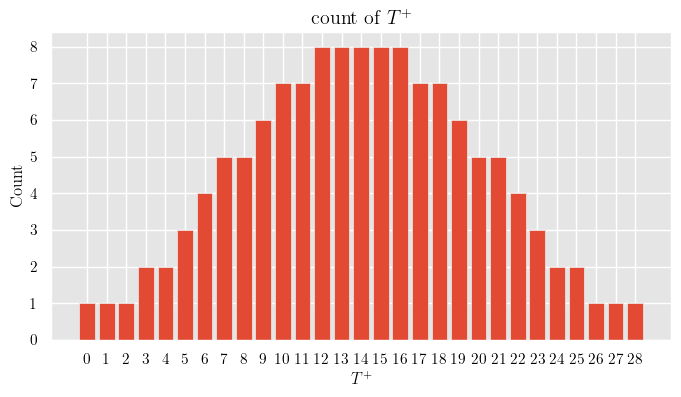

In [87]:
plt.figure(figsize=(8, 4))
plt.bar(*zip(*plot_values))
plt.xlabel(r"$T^+$")
plt.ylabel("Count")
plt.title("count of $T^+$")
plt.xticks(np.arange(0, 29,1))
plt.savefig(save_dir.joinpath("t_plus_count.png"), dpi=300, facecolor="white")
plt.show()

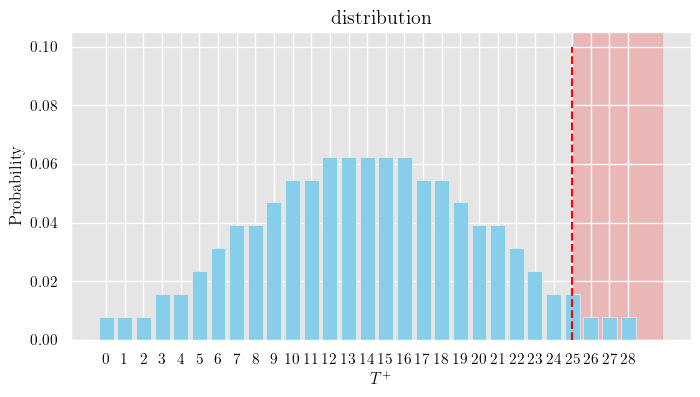

In [101]:
plt.figure(figsize=(8, 4))
ax = plt.gca()

# bar
ax.bar(*zip(*plot_values), color="skyblue", zorder=2)

# 背景をvlineの右側だけ薄赤に
xmax = ax.get_xlim()[1]
ax.axvspan(25, xmax, color="red", alpha=0.2, zorder=0)

# vline
ax.vlines(25, 0, 0.1, colors="red", linestyles="--", label="c", zorder=3)

ax.set_xlabel(r"$T^+$")
ax.set_ylabel("Probability")
ax.set_title("distribution")
ax.set_xticks(np.arange(0, 29, 1))
plt.savefig(save_dir.joinpath("t_plus_prob.png"), dpi=300, facecolor="white")
plt.show()


In [163]:
ps_cumsum = ps[::-1].cumsum()
ps_cumsum

array([0.0078125, 0.015625 , 0.0234375, 0.0390625, 0.0546875, 0.078125 ,
       0.109375 , 0.1484375, 0.1875   , 0.234375 , 0.2890625, 0.34375  ,
       0.40625  , 0.46875  , 0.53125  , 0.59375  , 0.65625  , 0.7109375,
       0.765625 , 0.8125   , 0.8515625, 0.890625 , 0.921875 , 0.9453125,
       0.9609375, 0.9765625, 0.984375 , 0.9921875, 1.       ])

In [172]:
ps_cumsum[4] / probs

np.float64(7.0)